In [8]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [6]:
# Carregamento do Dataset Iris

X, y = load_iris(return_X_y=True, as_frame=True)

In [11]:
# Divisão entre treino e testes

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Criar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf.fit(X_treino, y_treino)

RandomForestClassifier(oob_score=True, random_state=42)

In [14]:
# Predições no conjunto de teste
y_pred = rf.predict(X_teste)

In [15]:
# Avaliação: Matriz de Confusão
cm = confusion_matrix(y_teste, y_pred)

In [17]:
# Carregando apenas os rótulos do dataset Iris
iris = load_iris()
classes = iris.target_names

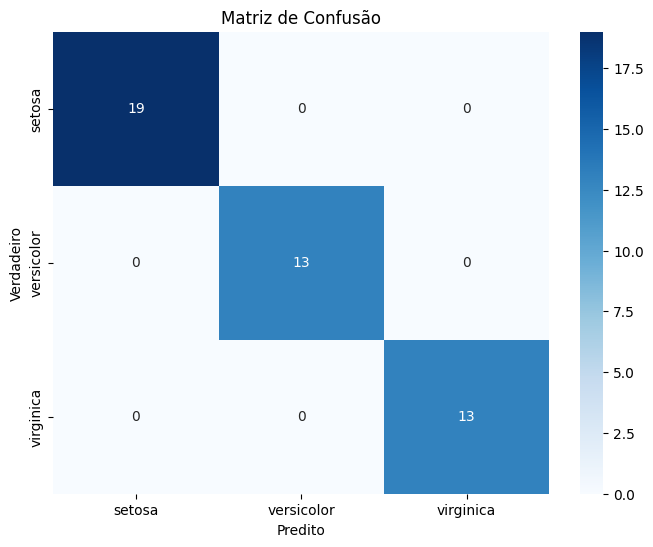

In [18]:
# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

In [19]:
# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred, target_names=classes))

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<ipython-input-20-2a0de72a977d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=iris.feature_names, palette="viridis")


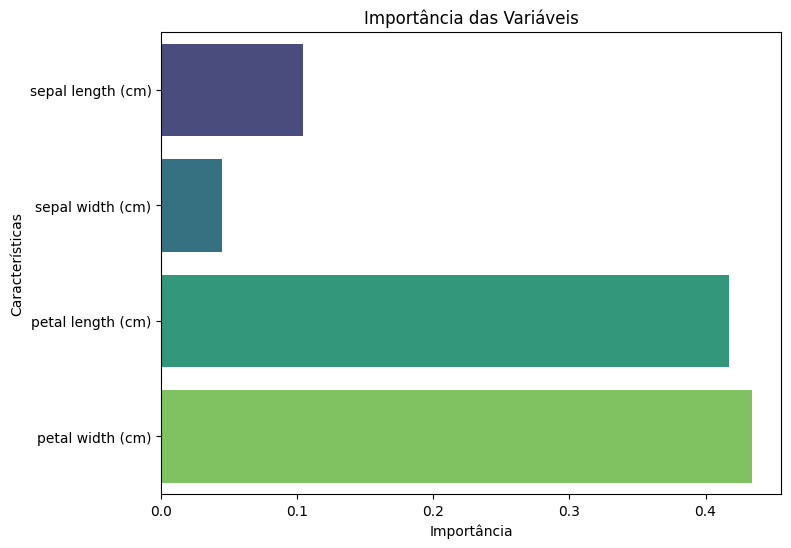

In [20]:
# Importância das variáveis
feature_importances = rf.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=iris.feature_names, palette="viridis")
plt.title("Importância das Variáveis")
plt.xlabel("Importância")
plt.ylabel("Características")
plt.show()